In [4]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import dataframe_image as dfi

### Sharesansar News

In [5]:
number_pages_to_scrape = 11

In [6]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
pd.set_option("display.max_colwidth", None)
from selenium.webdriver.common.action_chains import ActionChains
import time
from selenium.webdriver.common.keys import Keys

In [7]:
options = Options()
options.add_argument("start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

driver.get('https://www.sharesansar.com/category/latest')

blank_list = []
html = driver.page_source
parsed_url = BeautifulSoup(html, 'html.parser')
news = parsed_url.find('div', class_ = 'newslist')

for i in range(1,number_pages_to_scrape):
    if int(i) == 1:
        pass
    else:
        driver.find_element(By.LINK_TEXT, 'Next »').click()
        time.sleep(3)
        html = driver.page_source
        parsed_url = BeautifulSoup(html, 'html.parser')
        news = parsed_url.find('div', class_ = 'newslist')

    for index, news_list in enumerate(news.find_all('h4', class_ = 'featured-news-title')):
        a = news.find_all('span', class_ = 'text-org')[index]
        result = {'Published Date':a.text,
            'News Title':f'{news_list.text}'}#Storing the result details in dictionary
        blank_list.append(result)
driver.quit()
sharesansar_news = pd.DataFrame(blank_list)

In [8]:
sharesansar_news_text = ' '
for title in sharesansar_news['News Title']:
    sharesansar_news_text = title + ' ' + sharesansar_news_text

In [9]:
print(f'News since {a.text}')

News since Tuesday, September 19, 2023


### Merolagani News

In [10]:
pd.set_option("display.max_colwidth", None)
 
options = Options()
options.add_argument("start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

driver.get('https://eng.merolagani.com/NewsList.aspx')

for i in range(1, number_pages_to_scrape):
    element = driver.find_element(By.LINK_TEXT, "Load More")
    actions = ActionChains(driver)
    actions.move_to_element(element).perform()
    driver.find_element(By.LINK_TEXT, "Load More").click()
    time.sleep(1)

blank_list = []
html = driver.page_source
parsed_url = BeautifulSoup(html, 'html.parser')
news = parsed_url.find_all('h4', class_ = 'media-title')

merolagani_news_text = ' '
for newz in news:
    merolagani_news_text = f'{newz.text} ' + merolagani_news_text
    
driver.quit()

In [11]:
print(f"Merolagani News Since {list(parsed_url.find_all(class_ = 'media-label'))[-1].text}")

Merolagani News Since Sep 08, 2023


In [12]:
all_text = sharesansar_news_text + merolagani_news_text

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt

In [14]:
stopwords = set(STOPWORDS)

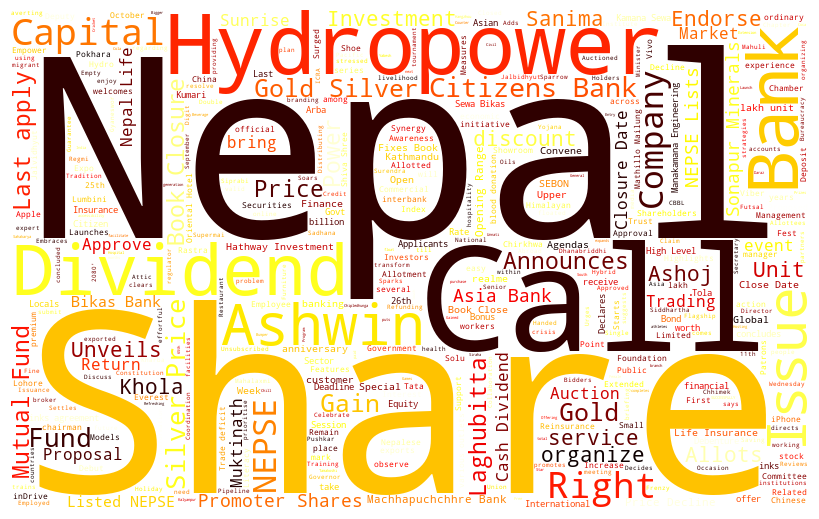

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

stopwords.add('Today')
wordcloud = WordCloud(width=800, height=500, stopwords= stopwords, max_words= 400, colormap= 'hot', background_color="white", min_word_length= 4).generate(all_text)

plt.figure(figsize=(8, 5), facecolor='None')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('News Wordcloud.jpeg')
plt.show()
